In [1]:
from plotnine import *
import pandas as pd
import numpy as np

In [2]:
time = "2024-03-14_14:51"
time = "2024-03-14_15:32"
time = "2024-03-14_17:26"
time = "2024-03-14_18:18"
time = "2024-03-14_19:00"
# time = "2024-03-14_20:08"
time = "2024-03-15_10:31"
time = "2024-03-15_13:27"
time = "2024-03-15_15:44"
time = "2024-03-15_16:27"
time = "2024-03-16_13:35"
time = "2024-03-18_09:34"
# time = "2024-03-18_16:10"
# time = "2024-03-19_00:56"
# time = "2024-03-20_04:35"
time = "2024-03-20_08:28"
time = "2024-03-20_13:00"
time = "2024-03-21_07:59"
# time = "2024-03-21_10:50"
time = "2024-03-21_20:28"
time = "2024-03-21_21:59"
time = "2024-03-22_19:23"
# time = "2024-03-23_02:14"
time = "2024-03-23_07:49"
time = "2024-03-25_01:47"

# time = "2024-03-29_04:53"
time = "2024-03-29_07:23"
time = "2024-03-31_15:54"
time = "2024-03-31_16:37"
time = "2024-03-31_17:12"
time = "2024-04-01_15:42"
time = "2024-04-01_17:06"
time = "2024-04-01_18:11"



df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")

# df['test_cumsum_annualized_return'] = df['test_cumsum_annualized_return'] * -1
# remove where dist_measure is 2
# remove where future_candles is 5
# remove where n_clusters is 150 or 200
# remove where log_return_threshold is greater than 0.01
# remove where calmar_ratio_threshold is not 2

# df = df[df["dist_measure"] != 2]
# df = df[df["window"] < 5]
# df = df[df["random_state"] == 42]
# df = df[df["test_size"] == 2880]
# df = df[df["n_clusters"] == 100]
# df = df[df["log_return_threshold"] <= 0.01]
df = df[(df["test_negative_sharpe_ratio"] >= 0.2) | (df["test_sharpe_ratio"] >= 0.2)]

df

,window,train_sum_annualized_return,train_sum_actual_return,train_n_trades,test_sum_annualized_return,test_sum_actual_return,test_n_trades,train_cumsum_annualized_return,train_cumsum_actual_return,train_sharpe_ratio,test_cumsum_annualized_return,test_cumsum_actual_return,test_sharpe_ratio,test_negative_sharpe_ratio,n_clusters,train_size,test_size,random_state
465,20,1.29,129,379,0.06,6,67,1.29,129,3.726405,0.06,6,-0.298794,0.207537,90,6720,960,161
466,21,1.38,138,439,-0.08,-8,61,2.67,267,3.726405,-0.02,-2,-0.298794,0.207537,90,6720,960,161
467,22,1.91,191,442,-0.19,-19,62,4.58,458,3.726405,-0.21,-21,-0.298794,0.207537,90,6720,960,161
468,23,1.77,177,435,-0.42,-42,96,6.35,635,3.726405,-0.63,-63,-0.298794,0.207537,90,6720,960,161
469,24,1.79,179,417,0.04,4,41,8.14,814,3.726405,-0.59,-59,-0.298794,0.207537,90,6720,960,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60755,46,1.73,173,374,0.24,24,52,48.50,4850,3.515572,1.21,121,0.214509,-0.331172,80,5760,960,198
60756,47,1.84,184,389,0.06,6,66,50.34,5034,3.515572,1.27,127,0.214509,-0.331172,80,5760,960,198
60757,48,1.33,133,335,0.06,6,44,51.67,5167,3.515572,1.33,133,0.214509,-0.331172,80,5760,960,198
60758,49,1.07,107,361,-0.07,-7,72,52.74,5274,3.515572,1.26,126,0.214509,-0.331172,80,5760,960,198


/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


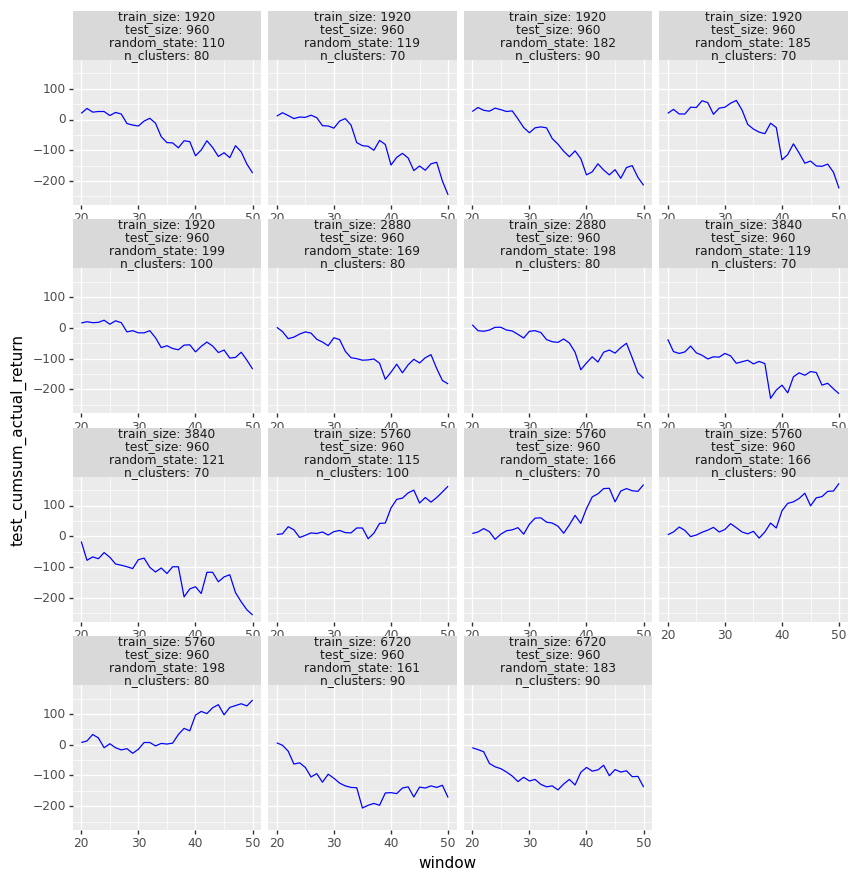

In [3]:
p = ggplot(df)
# p = p + geom_line(aes(x="window", y="train_cumsum_annualized_return"), color="red")
p = p + geom_line(aes(x="window", y="test_cumsum_actual_return"), color="blue")
# p = p + geom_line(aes(x="window", y="val_avg_calmar_ratio"), color="red")
# p = p + facet_wrap("~train_size + random_state", scales="free_x", labeller="label_both")
p = p + facet_wrap("~train_size + test_size + random_state + n_clusters", scales="free_x", labeller="label_both")
# p = p + theme(figure_size=(30, 30))
p = p + theme(figure_size=(10, 10))
print(p)

In [ ]:

time = "2024-03-14_19:00"
df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")

p = ggplot(df)
p = p + geom_line(aes(x="window", y="test_cumsum_annualized_return"), color="blue")
# p = p + geom_line(aes(x="window", y="val_cumsum_annualized_return"), color="red")
p = p + facet_wrap("~train_size + test_size + random_state", scales="free_x", labeller="label_both")
p = p + theme(axis_text_x=element_text(angle=90), figure_size=(30, 30))
print(p)

In [ ]:
4 * 24 * 20